<a href="https://colab.research.google.com/github/njgeorge000158/Cryptocurrency-Cluster-Analysis-with-PCA-Using-Scikit-Learn/blob/main/crypto_clustering_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#*******************************************************************************************
 #
 #  File Name:  crypto_clustering_colab.ipynb
 #
 #  File Description:
 #      This IPython notebook, crypto_clustering_colab.ipynb, reads a csv file,
 #      crypto_market_data.csv, in the folder, resources, and uses Python
 #      and unsupervised learning methods such as K-Means to examine how
 #      24-hour or 7-day price changes affect cryptocurrencies.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  11/20/2023      Initial Development                     Nicholas J. George
 #
 #******************************************************************************************/

from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.insert(0,'./gdrive/MyDrive/cryptocurrency_cluster_analysis')

import os
os.environ['HV_DOC_HTML'] = 'true'

!apt-get update
!apt install firefox firefox-geckodriver
!pip install -U dataframe_image
!pip install -U selenium
!pip install -U kaleido
!pip install -U hvplot
!pip install -U plotly
!pip install -U panel
!pip install -U bokeh

import hvplot
import hvplot.pandas

import pandas as pd

import holoviews as hv
hv.extension('bokeh')

import logx
logx.set_logs_directory_path('./gdrive/MyDrive/cryptocurrency_cluster_analysis/logs')
logx.set_images_directory_path('./gdrive/MyDrive/cryptocurrency_cluster_analysis/images')

import pandasx
pandasx.set_google_colab(True)

import kmeans_analysisx

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.options.mode.chained_assignment = None

Mounted at /content/gdrive/
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,370 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,035 kB]
Get:13 https://

In [2]:
CONSTANT_LOCAL_FILE_NAME = 'crypto_clustering_colab.ipynb'

CONSTANT_CRYPTO_CSV_FILE_PATH = './gdrive/MyDrive/cryptocurrency_cluster_analysis/resources/crypto_market_data.csv'


logx.set_log_mode(False)

logx.set_image_mode(False)


logx.begin_program('crypto_clustering_colab')

In [3]:
colors_string_list \
    = ['firebrick', 'green', 'orange', 'lightsteelblue', 'gold', 'purple', 'blue']

# <br> **Section 1: Data Preparation**

## **1.1: Extraction**

### **Read CSV File into DataFrame**

In [4]:
data_type_dictionary \
    = {'coin_id': str,
       'price_change_percentage_24h': float,
       'price_change_percentage_7d': float,
       'price_change_percentage_14d': float,
       'price_change_percentage_30d': float,
       'price_change_percentage_60d': float,
       'price_change_percentage_200d': float,
       'price_change_percentage_1y': float}

crypto_dataframe \
    = pd.read_csv(CONSTANT_CRYPTO_CSV_FILE_PATH, index_col = 'coin_id', dtype = data_type_dictionary)

logx.log_write_object(crypto_dataframe)

## **1.2: Display DataFrames**

### **Display DataFrame Table**

In [5]:
  pandasx.return_formatted_table \
      (crypto_dataframe, 'Table 1.2.1: Cryptocurrencies DataFrame Table', hide_index_boolean = False)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08,7.60,6.58,7.67,-3.25,83.52,37.52
ethereum,0.22,10.38,4.81,0.13,-12.89,186.77,101.96
tether,-0.21,0.05,0.01,-0.04,0.28,-0.01,0.02
ripple,-0.38,-0.61,2.25,0.23,-17.55,39.54,-16.60
bitcoin-cash,2.91,17.10,14.75,15.75,-13.72,21.66,14.49
binancecoin,2.10,12.86,6.81,0.06,36.33,155.62,69.69
chainlink,-0.24,20.69,9.30,-11.22,-43.70,403.23,325.13
cardano,0.00,13.99,5.55,10.11,-22.85,264.51,156.10
litecoin,-0.06,6.60,7.29,1.22,-17.24,27.50,-12.66


### **Display DataFrame Summary Statistics**

In [6]:
pandasx.return_formatted_description \
    (crypto_dataframe, 'Table 1.2.2: Cryptocurrencies DataFrame Summary Statistics')

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41,41,41,41,41,41,41
mean,-0.27,4.50,0.19,1.55,-0.09,236.54,347.67
std,2.69,6.38,8.38,26.34,47.37,435.23,"1,247.84"
min,-14,-6,-18,-35,-45,-0,-18
25%,-0.61,0.05,-5.03,-10.44,-25.91,21.66,0.41
50%,-0.06,3.30,0.11,-0.04,-7.54,83.91,69.69
75%,0.61,7.60,5.51,4.58,0.66,216.18,168.37
max,5,21,24,141,223,"2,228","7,852"


### **Display DataFrame Information**

In [7]:
logx.print_and_log_text \
    ('\033[1m' + 'Table 1.2.3: Cryptocurrencies DataFrame Information:\n' + '\033[0m')

crypto_dataframe.info(verbose = True, memory_usage = True, show_counts = True)

Table 1.2.3: Cryptocurrencies DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### **Display DataFrame HVPlot**

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
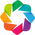

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [8]:
hv.extension('bokeh')

crypto_dataframe.hvplot.line \
    (title = '1.2.4: Cryptocurrencies Price Change (%)',
     xlabel = 'Cryptocurrency', ylabel = 'Price Change (%)',
     fontsize = {'title': 18.0,
                 'xlabel': 12.0,
                 'ylabel': 12.0,
                 'ticks': 10.0,
                 'legend': 10.0},
     height = 480, width = 960, rot = 90,
     grid = True, legend = 'right')

## **1.3: Machine Learning Preparation**

### **Normalize the Cryptocurrency Data**

In [9]:
normalized_crypto_nparray = StandardScaler().fit_transform(crypto_dataframe)

logx.log_write_object(normalized_crypto_nparray)

### **Create a Normalized Cryptocurrency DataFrame**

In [10]:
normalized_crypto_dataframe \
    = pd.DataFrame(normalized_crypto_nparray, columns = crypto_dataframe.columns, index = crypto_dataframe.index)

logx.log_write_object(normalized_crypto_dataframe)

### **Display Normalized Cryptocurrency DataFrame Table**

In [11]:
pandasx.return_formatted_table \
    (normalized_crypto_dataframe, 'Table 1.3.1: Normalized Cryptocurrency DataFrame Table')

price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0.51,0.49,0.77,0.24,-0.07,-0.36,-0.25
0.19,0.93,0.56,-0.05,-0.27,-0.12,-0.20
0.02,-0.71,-0.02,-0.06,0.01,-0.55,-0.28
-0.04,-0.81,0.25,-0.05,-0.37,-0.46,-0.30
1.19,2.00,1.76,0.55,-0.29,-0.50,-0.27
0.89,1.33,0.80,-0.06,0.78,-0.19,-0.23
0.01,2.57,1.10,-0.49,-0.93,0.39,-0.02
0.10,1.51,0.65,0.33,-0.49,0.07,-0.16
0.08,0.33,0.86,-0.01,-0.37,-0.49,-0.29
0.45,-0.19,-0.25,0.05,-0.53,-0.53,-0.21


### **Display Normalized Cryptocurrency DataFrame Summary Statistics**

In [12]:
pandasx.return_formatted_description \
    (normalized_crypto_dataframe, 'Table 1.3.2: Normalized Cryptocurrency DataFrame Summary Statistics')

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41,41,41,41,41,41,41
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-5,-2,-2,-1,-1,-1,-0
25%,-0.13,-0.71,-0.63,-0.46,-0.55,-0.50,-0.28
50%,0.08,-0.19,-0.01,-0.06,-0.16,-0.36,-0.23
75%,0.33,0.49,0.64,0.12,0.02,-0.05,-0.15
max,2,3,3,5,5,5,6


### **Display DataFrame Information**

In [13]:
logx.print_and_log_text \
    ('\033[1m' + 'Table 1.3.3: Normalized Cryptocurrency DataFrame Information:\n' + '\033[0m')

normalized_crypto_dataframe.info(verbose = True, memory_usage = True, show_counts = True)

Table 1.3.3: Normalized Cryptocurrency DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### **Display DataFrame HVPlot**

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
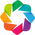

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [14]:
hv.extension('bokeh')

normalized_crypto_dataframe.hvplot.line \
    (title = '1.2.4: Normalized Cryptocurrency Price Change (%)',
     xlabel = 'Cryptocurrency', ylabel = 'Price Change (%)',
     fontsize = {'title': 16.0,
                 'xlabel': 12.0,
                 'ylabel': 12.0,
                 'ticks': 10.0,
                 'legend': 10.0},
     height = 480, width = 960, rot = 90,
     grid = True, legend = 'right')

# <br> **Section 2: Find the Best Value for k Using the Original Data**

## **2.1:  K-Means Methods**

### **WCSS Elbow Method**

In [15]:
optimal_k_elbow_integer, inertia_elbow_series \
    = kmeans_analysisx.return_optimal_k_with_wcss_elbow(normalized_crypto_dataframe)

logx.print_and_log_text \
    ('\033[1m' + 'Using the WCSS Elbow Method, the optimal value for k is '
     + '{:,}.'.format(optimal_k_elbow_integer) + '\033[0m')

Using the WCSS Elbow Method, the optimal value for k is 4.


### **Calinski-Harabasz Method**

In [16]:
optimal_k_calinski_harabasz_integer, inertia_calinski_harabasz_series \
    = kmeans_analysisx.return_optimal_k_with_calinski_harabasz(normalized_crypto_dataframe)

logx.print_and_log_text \
    ('\033[1m' + 'Using the Calinski-Harabasz Method, the optimal value for k is '
     + '{:,}.'.format(optimal_k_calinski_harabasz_integer) + '\033[0m')

Using the Calinski-Harabasz Method, the optimal value for k is 4.


### **Silhouette method**

In [17]:
optimal_k_silhouette_integer, inertia_silhouette_series \
    = kmeans_analysisx.return_optimal_k_with_silhouette(normalized_crypto_dataframe)

logx.print_and_log_text \
    ('\033[1m' + 'Using the Silhouette Method, the optimal value for k is '
     + '{:,}.'.format(optimal_k_silhouette_integer) + '\033[0m')

Using the Silhouette Method, the optimal value for k is 3.


### **Davies-Bouldin Method**

In [18]:
optimal_k_davies_bouldin_integer, inertia_davies_bouldin_series \
    = kmeans_analysisx.return_optimal_k_with_davies_bouldin(normalized_crypto_dataframe)

logx.print_and_log_text \
    ('\033[1m' + 'Using the Davies-Bouldin Method, the optimal value for k is '
     + '{:,}.'.format(optimal_k_davies_bouldin_integer) + '\033[0m')

Using the Davies-Bouldin Method, the optimal value for k is 2.


## **2.2: Display K-Means Method Plots**

In [19]:
inertia_series_list \
    = [inertia_elbow_series,
       inertia_calinski_harabasz_series,
       inertia_silhouette_series,
       inertia_davies_bouldin_series]

optimal_k_integer_list \
    = [optimal_k_elbow_integer,
       optimal_k_calinski_harabasz_integer,
       optimal_k_silhouette_integer,
       optimal_k_davies_bouldin_integer]

kmeans_analysisx.return_cluster_plots \
    (optimal_k_integer_list, inertia_series_list, colors_string_list, '2.2.1: K-Means Methods Line Plots')

### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** Although both k=3 and k=4 are possible answers, the cluster predictions from the WCSS Elbow Method point to k=4 being the best value for `k`.

# <br> **Section 3: Cryptocurrencies with K-means Clusters**

## **3.1: Predict the Cryptocurrency Clusters**

### **Calculations**

In [20]:
predictions_integer_list_list \
    = kmeans_analysisx.return_cluster_predictions(normalized_crypto_dataframe, [2, 3, 4])

### **Display Cluster Prediction Arrays**

In [21]:
logx.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 2 is as follows:\n\n' + '\033[0m'
     + f'{predictions_integer_list_list[0]}')

The array of cluster predictions for k = 2 is as follows:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 1]


In [22]:
logx.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 3 is as follows:\n\n' + '\033[0m'
     + f'{predictions_integer_list_list[1]}')

The array of cluster predictions for k = 3 is as follows:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [23]:
logx.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 4 is as follows:\n\n' + '\033[0m'
     + f'{predictions_integer_list_list[2]}')

The array of cluster predictions for k = 4 is as follows:

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


## **3.2: Add Predictions to Normalized DataFrame**

### **Calculations**

In [24]:
normalized_crypto_predictions_dataframe \
    = normalized_crypto_dataframe \
          [['price_change_percentage_24h', 'price_change_percentage_7d']].copy()

for index, prediction in enumerate(predictions_integer_list_list):

    normalized_crypto_predictions_dataframe \
        ['prediction_k_' + str(index + 3)] \
            = predictions_integer_list_list[index]

### **Display Normalized Cryptocurrency Predictions Table**

In [25]:
pandasx.return_formatted_table \
    (normalized_crypto_predictions_dataframe,
     'Table 3.2.1: Normalized Cryptocurrency with Predictions DataFrame Table')

price_change_percentage_24h,price_change_percentage_7d,prediction_k_3,prediction_k_4,prediction_k_5
0.51,0.49,1,0,3
0.19,0.93,1,0,3
0.02,-0.71,1,0,0
-0.04,-0.81,1,0,0
1.19,2.00,1,0,3
0.89,1.33,1,0,3
0.01,2.57,1,0,3
0.10,1.51,1,0,3
0.08,0.33,1,0,3
0.45,-0.19,1,0,0


## **3.3: Normalized Cryptocurrency Predictions Scatter Plots (2-D)**

In [26]:
kmeans_analysisx.return_k_clusters_2d_scatter_plot \
    (normalized_crypto_dataframe, [4, 4, 3, 2], colors_string_list,
     '3.3.1: K-Means Price Change (%) Scatter Plots',
     'price_change_percentage_24h', 'price_change_percentage_7d')

## **3.4: Normalized Cryptocurrency Predictions Scatter Plots (3-D)**

In [27]:
kmeans_analysisx.return_k_clusters_3d_scatter_plot \
    (crypto_dataframe, 4, colors_string_list,
     '3.4.1: Cryptocurrency Price Change (%) 3-D Scatter Plot (k=4)',
     ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d'])

In [28]:
kmeans_analysisx.return_k_clusters_3d_scatter_plot \
    (crypto_dataframe, 3, colors_string_list,
     '3.4.2: Cryptocurrency Price Change (%) 3-D Scatter Plot (k=3)',
     ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d'])

In [29]:
kmeans_analysisx.return_k_clusters_3d_scatter_plot \
    (crypto_dataframe, 2, colors_string_list,
     '3.4.4: Cryptocurrency Price Change (%) 3-D Scatter Plot (k=2)',
     ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d'])

# <br> **Section 4: Optimize K-Means Clusters with Principal Component Analysis**

## **4.1: PCA Component Explained Variance**

### **Calculations**

In [30]:
pca_model = PCA (n_components = 3)

In [31]:
crypto_pca_nparray = pca_model.fit_transform(normalized_crypto_dataframe)

crypto_pca_nparray[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

### **Display the Explained Variance for Each Component**

In [32]:
total_explained_variance = 0

for index, variance in enumerate(pca_model.explained_variance_ratio_):

    total_explained_variance += variance

    logx.print_and_log_text \
        (f'PCA{index + 1} explained variance: '
         + '\033[1m' + '{:.2f}%'.format(variance * 100) + '\033[0m')

PCA1 explained variance: 37.20%
PCA2 explained variance: 34.70%
PCA3 explained variance: 17.60%


In [33]:
logx.print_and_log_text \
    ('The total explained variance of the three principal components is '
     + '\033[1m' + '{:.2f}%\n\n'.format(total_explained_variance * 100) + '\033[0m')

The total explained variance of the three principal components is 89.50%




### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer: 89.50%**

## **4.2: PCA Cryptocurrency DataFrame**

### **Calculations**

In [34]:
pca_columns_string_list \
    = ['PCA{}'.format(n) for n in range(1, 4)]

crypto_pca_dataframe \
    = pd.DataFrame \
          (crypto_pca_nparray, columns = pca_columns_string_list, index = normalized_crypto_dataframe.index)

logx.log_write_object(crypto_pca_dataframe)

### **Display PCA Cryptocurrency DataFrame**

In [35]:
pandasx.return_formatted_table \
    (crypto_pca_dataframe, 'Table 4.2.1: Cryptocurrencies PCA DataFrame Table', hide_index_boolean = False)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.60,0.84,0.46
ethereum,-0.46,0.46,0.95
tether,-0.43,-0.17,-0.64
ripple,-0.47,-0.22,-0.48
bitcoin-cash,-1.16,2.04,1.86
binancecoin,-0.52,1.39,0.80
chainlink,-0.45,0.52,2.85
cardano,-0.35,0.73,1.48
litecoin,-0.65,0.43,0.60


# <br> **Section 5: Find the Best Value for K Using PCA**

## **Section 5.1: K-Means Methods with PCA**

### **WCSS Elbow Method**

In [36]:
optimal_k_pca_elbow_integer, inertia_pca_elbow_series \
    = kmeans_analysisx.return_optimal_k_with_wcss_elbow(crypto_pca_dataframe)

logx.print_and_log_text \
    ('\033[1m' + 'Using the WCSS Elbow Method with PCA components, the optimal value for k is ' \
     + '{:,}.'.format(optimal_k_pca_elbow_integer) + '\033[0m')

Using the WCSS Elbow Method with PCA components, the optimal value for k is 4.


### **Calinski-Harabasz Method**

In [37]:
optimal_k_pca_calinski_harabasz_integer, inertia_pca_calinski_harabasz_series \
    = kmeans_analysisx.return_optimal_k_with_calinski_harabasz(crypto_pca_dataframe)

logx.print_and_log_text \
    ('\033[1m' + 'Using the Calinski-Harabasz Method with PCA components, the optimal value for k is ' \
     + '{:,}.'.format(optimal_k_pca_calinski_harabasz_integer) + '\033[0m')

Using the Calinski-Harabasz Method with PCA components, the optimal value for k is 10.


### **Silhouette method**

In [38]:
optimal_k_pca_silhouette_integer, inertia_pca_silhouette_series \
    = kmeans_analysisx.return_optimal_k_with_silhouette(crypto_pca_dataframe)

logx.print_and_log_text \
    ('\033[1m' + 'Using the Silhouette Method with PCA components, the optimal value for k is ' \
     + '{:,}.'.format(optimal_k_pca_silhouette_integer) + '\033[0m')

Using the Silhouette Method with PCA components, the optimal value for k is 3.


### **Davies-Bouldin Method**

In [39]:
optimal_k_pca_davies_bouldin_integer, inertia_pca_davies_bouldin_series \
    = kmeans_analysisx.return_optimal_k_with_davies_bouldin(crypto_pca_dataframe)

logx.print_and_log_text \
    ('\033[1m' + 'Using the Davies-Bouldin Method with PCA components, the optimal value for k is ' \
     + '{:,}.'.format(optimal_k_pca_davies_bouldin_integer) + '\033[0m')

Using the Davies-Bouldin Method with PCA components, the optimal value for k is 2.


## **5.2: Display Methods with PCA Plots**

In [40]:
inertia_pca_series_list \
    = [inertia_pca_elbow_series,
       inertia_pca_calinski_harabasz_series,
       inertia_pca_silhouette_series,
       inertia_pca_davies_bouldin_series]

optimal_k_pca_integer_list \
    = [optimal_k_pca_elbow_integer,
       optimal_k_pca_calinski_harabasz_integer,
       optimal_k_pca_silhouette_integer,
       optimal_k_pca_davies_bouldin_integer]

kmeans_analysisx.return_cluster_plots \
    (optimal_k_pca_integer_list,
     inertia_pca_series_list,
     colors_string_list,
     '5.2.1: K-Means Methods with PCA Data Line Plots')

### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Although k=2, k=3, k=4, and k=10 are possible answers, the cluster predictions from the WCSS Elbow Method point to k=4 being the best value for `k`.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No. The only real deviation from the previous results is the Calinski-Harabasz method with k=10, but the Calinski-Harabasz index may not work well for finding the best k in PCA situations; ultimately, selecting the appropriate number of clusters is subjective, with k=3 and k=4 being the reasonable options.

# <br> **Section 6: Cluster Cryptocurrencies with K-means Using PCA**

## **6.1: Predict Cryptocurrency K-Means Clusters Using PCA**

### **Calculations**

In [41]:
predictions_pca_integer_list_list \
    = kmeans_analysisx.return_cluster_predictions(crypto_pca_dataframe, [2, 3, 4, 10])

### **Display Cluster Prediction Arrays**

In [42]:
logx.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 2 using PCA data is as follows:\n\n' + '\033[0m'
     + f'{predictions_pca_integer_list_list[0]}')

The array of cluster predictions for k = 2 using PCA data is as follows:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0]


In [43]:
logx.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 3 using PCA data is as follows:\n\n' + '\033[0m'
     + f'{predictions_pca_integer_list_list[1]}')

The array of cluster predictions for k = 3 using PCA data is as follows:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [44]:
logx.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 4 using PCA data is as follows:\n\n' + '\033[0m'
     + f'{predictions_pca_integer_list_list[2]}')

The array of cluster predictions for k = 4 using PCA data is as follows:

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 2 3 1 1 0
 1 1 1 1]


In [45]:
logx.print_and_log_text \
    ('\033[1m' + 'The array of cluster predictions for k = 10 using PCA data is as follows:\n\n' + '\033[0m'
     + f'{predictions_pca_integer_list_list[3]}')

The array of cluster predictions for k = 10 using PCA data is as follows:

[1 1 4 4 5 1 7 7 1 9 0 4 4 5 9 9 0 9 7 4 0 1 4 4 4 4 9 0 1 6 9 9 3 9 8 4 2
 0 9 4 4]


## **6.2: Add PCA Predictions to Normalized DataFrame**

### **Calculations**

In [46]:
crypto_pca_prediction_dataframe = crypto_pca_dataframe.copy()

for index, prediction in enumerate(predictions_pca_integer_list_list):

    crypto_pca_prediction_dataframe['Pca_cluster' + str(index + 3)] = predictions_pca_integer_list_list[index]

### **Display Cryptocurrencies with PCA Predictions**

In [47]:
pandasx.return_formatted_table \
    (crypto_pca_prediction_dataframe,
     'Table 6.2.1: Cryptocurrency with Predictions Using PCA Data Table',
     hide_index_boolean = False)

,PCA1,PCA2,PCA3,Pca_cluster3,Pca_cluster4,Pca_cluster5,Pca_cluster6
coin_id,,,,,,,
bitcoin,-0.60,0.84,0.46,0,0,3,1
ethereum,-0.46,0.46,0.95,0,0,3,1
tether,-0.43,-0.17,-0.64,0,0,1,4
ripple,-0.47,-0.22,-0.48,0,0,1,4
bitcoin-cash,-1.16,2.04,1.86,0,0,3,5
binancecoin,-0.52,1.39,0.80,0,0,3,1
chainlink,-0.45,0.52,2.85,0,0,3,7
cardano,-0.35,0.73,1.48,0,0,3,7
litecoin,-0.65,0.43,0.60,0,0,3,1


## **6.3: Normalized Cryptocurrency Predictions Using PCA Scatter Plots (2-D)**

In [48]:
kmeans_analysisx.return_k_clusters_2d_scatter_plot \
    (crypto_pca_dataframe, [4, 10, 3, 2], colors_string_list,
     '6.3.1: K-Means Scatter Plots (PCA1 vs. PCA2)', 'PCA1', 'PCA2')

In [49]:
kmeans_analysisx.return_k_clusters_2d_scatter_plot \
    (crypto_pca_dataframe, [4, 10, 3, 2], colors_string_list,
     '6.3.2: K-Means Scatter Plots (PCA1 vs. PCA3)', 'PCA1', 'PCA3')

In [50]:
kmeans_analysisx.return_k_clusters_2d_scatter_plot \
    (crypto_pca_dataframe, [4, 10, 3, 2], colors_string_list,
     '6.3.3: K-Means Scatter Plots (PCA2 vs. PCA3)', 'PCA2', 'PCA3')

## **6.4: Normalized Cryptocurrency Predictions Using PCA Scatter Plots (3-D)**

In [51]:
kmeans_analysisx.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 4, colors_string_list,
     '6.4.1: Cryptocurrency Data Using PCA 3-D Scatter Plot (k=4)', ['PCA1', 'PCA2', 'PCA3'])

In [52]:
kmeans_analysisx.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 10, colors_string_list,
     '6.4.2: Cryptocurrency Data Using PCA 3-D Scatter Plot (k=10)', ['PCA1', 'PCA2', 'PCA3'])

In [53]:
kmeans_analysisx.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 3, colors_string_list,
     '6.4.3: Cryptocurrency Data Using PCA 3-D Scatter Plot (k=3)', ['PCA1', 'PCA2', 'PCA3'])

In [54]:
kmeans_analysisx.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 2, colors_string_list,
     '6.4.1: Cryptocurrency Data Using PCA 3-D Scatter Plot (k=2)', ['PCA1', 'PCA2', 'PCA3'])

# <br> **Section 7: Visualize and Compare the Results**

## **7.1: Contrast Elbow Method Line Curves for K=4**

In [55]:
kmeans_analysisx.return_cluster_plots \
    ([optimal_k_elbow_integer], [inertia_elbow_series],
     colors_string_list, '7.1.1: K-Means WCSS Elbow Method (Original)')

In [56]:
kmeans_analysisx.return_cluster_plots \
    ([optimal_k_pca_elbow_integer], [inertia_pca_elbow_series],
     colors_string_list, '7.1.2: K-Means WCSS Elbow Method (PCA)')

## **7.2: Contrast 2-D Scatter Plots for K=4**

In [57]:
kmeans_analysisx.return_k_clusters_2d_scatter_plot \
    (normalized_crypto_dataframe, [4], colors_string_list,
     '7.2.1: K-Means Price Change (%) (Original)',
     'price_change_percentage_24h', 'price_change_percentage_7d')

In [58]:
kmeans_analysisx.return_k_clusters_2d_scatter_plot \
    (crypto_pca_dataframe, [4], colors_string_list,
     '7.2.2: K-Means Price Change (%) (PCA)', 'PCA1', 'PCA2')

## **7.3: Contrast 3-D Scatter Plots for K=4**

In [59]:
kmeans_analysisx.return_k_clusters_3d_scatter_plot \
    (crypto_dataframe, 4, colors_string_list,
     '7.3.1: Cryptocurrency Data 3-D Scatter Plot (K=4)',
     ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d'])

In [60]:
kmeans_analysisx.return_k_clusters_3d_scatter_plot \
    (crypto_pca_dataframe, 4, colors_string_list,
     '7.3.1: Cryptocurrency Data with PCA 3-D Scatter Plot (K=4)',
      ['PCA1', 'PCA2', 'PCA3'])

### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** After examining the cluster analysis results visually, the cluster distribution for PCA data has better performance and tighter grouping of data points within each cluster.  Using fewer features with the PCA data has had a positive impact with better-defined and separable clusters compared to the original data. This reduction has helped to highlight patterns and reduce the impact of noise, leading to more meaningful clustering results.

In [61]:
# log_subroutine.end_program()